### 1.删除
* pandas模块的 dropna 函数
    * 对于Series 数据可以直接删除
    * 对于DataFrame 数据，如果过滤掉，至少丢掉包含缺失值所在的一行or一列，需要慎重处理
    * 语法结构：dropna(axis=0,how='any',thresh=None)
        how参数可选值为all/any，all表示丢掉全为NA的行
        thresh为整数类型，表示删除条件，如thresh=3，表示一行中至少有3个非NA值才将其保留

In [1]:
import  pandas as pd
import numpy as np

In [10]:
data = pd.DataFrame(np.random.randn(10,2),columns=['A','B'])
data

,A,B
0,2.164620,0.712841
1,-0.180775,-0.061259
2,-1.812117,1.235230
3,0.227342,1.261301
4,1.073383,0.357950
5,0.159990,-0.937625
6,0.924624,0.669597
7,-0.579282,0.317043
8,-0.583416,0.114243
9,-1.407257,0.210781


In [13]:
data.iloc[2,0] = np.nan

In [14]:
data.iloc[6] = np.nan

In [15]:
data

,A,B
0,2.164620,0.712841
1,-0.180775,-0.061259
2,NaN,1.235230
3,0.227342,1.261301
4,1.073383,0.357950
5,0.159990,-0.937625
6,NaN,NaN
7,-0.579282,0.317043
8,-0.583416,0.114243
9,-1.407257,0.210781


# pandas中dropna（）参数详解
* dropna( axis=0, how=‘any’, thresh=None, subset=None, inplace=False)
   * axis=0或axis='index’删除含有缺失值的行，

   * axis=1或axis='columns’删除含有缺失值的列，
   
# how参数当我们至少有一个NA时，确定是否从DataFrame中删除行或列

 * how='all’时表示删除全是缺失值的行（列）

 * how='any’时表示删除只要含有缺失值的行（列）
 
 * thresh=n 表示保留至少含有n个非na数值的行
 
 *  subset定义要在哪些列中查找缺失值
 
 * inplace表示直接在原DataFrame修改

In [16]:
data1 = data.dropna(how='all')
data1

,A,B
0,2.164620,0.712841
1,-0.180775,-0.061259
2,NaN,1.235230
3,0.227342,1.261301
4,1.073383,0.357950
5,0.159990,-0.937625
7,-0.579282,0.317043
8,-0.583416,0.114243
9,-1.407257,0.210781


### 2. 数值填充
* pandas fillna() 函数
    * 向前/向后填充
    * 给定值（如 均值/中位数填充等）
    * 语法格式：fillna(value,method,axis) value给定具体的值，method 采用填补数值的方法，默认None
* sklearn.preprocessing 中的Imputer 模块，这里不细讲


In [17]:
data2 = data1.fillna({'A':data1['A'].mean()})
data2

,A,B
0,2.164620,0.712841
1,-0.180775,-0.061259
2,0.109326,1.235230
3,0.227342,1.261301
4,1.073383,0.357950
5,0.159990,-0.937625
7,-0.579282,0.317043
8,-0.583416,0.114243
9,-1.407257,0.210781


### 3. 插值法
* scipy.interpolate 模块
    * 线性插值
    * 样条插值
    * 拉格朗日插值
* 对于有缺失值的数据，将没有缺失的数据的索引做x，值做y,带入拟合。然后将缺失值的索引传入输出的值即为插值

In [18]:
from scipy.interpolate import interp1d,lagrange
import matplotlib.pyplot as plt

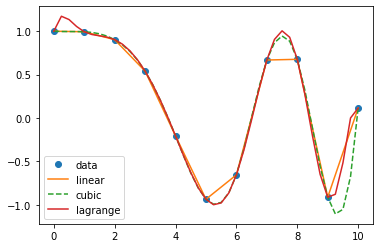

In [19]:
x = np.linspace(0,10,num=11,endpoint=True)  # 生成一个0-10的等差数列
y = np.cos(-x**2/9.0)
f1 = interp1d(x,y) # 默认线性插值

f2 = interp1d(x,y,kind='cubic')  # 样条插值

f3 = lagrange(x,y) # 拉格朗日插值

new_x = np.linspace(0,10,num=41,endpoint=True)

plt.plot(x,y,'o',new_x,f1(new_x),'-',new_x,f2(new_x),'--',new_x,f3(new_x))
plt.legend(['data','linear','cubic','lagrange'],loc='best')
plt.show()

In [20]:
import tushare as ts 
pro = ts.pro_api('eb13b3bfd2bd07fd9eb40234f19941c73f230e1e98cc212b8cd407c7')
data3 = pro.daily(ts_code='603507.SH',start_date = '20201210',end_date='20210210')
data3 = data3.set_index('trade_date').sort_index()

In [21]:
data4 = pro.index_daily(ts_code='399300.SZ',start_date = '20201210',end_date='20210210')

In [18]:
data4 = data4.set_index('trade_date').sort_index()  # 沪深300的行情数据

In [22]:
data3 = data3.rename(columns={'close':'603507.SH'})
data4 = data4.rename(columns={'close':'399300.SZ'})

In [20]:
data5 = pd.concat([data3['603507.SH'],data4['399300.SZ']],axis=1,join='outer')

In [21]:
data5 

,603507.SH,399300.SZ
20201210,23.18,4940.5249
20201211,21.95,4889.6292
20201214,23.20,4934.8352
20201215,23.85,4945.1000
20201216,23.64,4953.8670
20201217,24.00,5017.4784
20201218,24.10,4999.9678
20201221,25.07,5046.8396
20201222,24.29,4964.7727
20201223,25.18,5007.1235


In [22]:
data6 = data5.sort_index()

In [23]:
data6

,603507.SH,399300.SZ
20201210,23.18,4940.5249
20201211,21.95,4889.6292
20201214,23.20,4934.8352
20201215,23.85,4945.1000
20201216,23.64,4953.8670
20201217,24.00,5017.4784
20201218,24.10,4999.9678
20201221,25.07,5046.8396
20201222,24.29,4964.7727
20201223,25.18,5007.1235


In [24]:
data7 = data6['603507.SH']
data7.index = np.arange(0,len(data7))

In [26]:
x = data7.dropna().index.tolist()  # 原始的x
y = data7.dropna().values.tolist() # 原始的y

In [27]:
func = interp1d(x,y,kind='cubic')

In [30]:
new_x = data7.index.tolist()
new_y = [func(i).round(2)  for i  in new_x]
data6['new_603507.SH'] = new_y

In [31]:
data6

,603507.SH,399300.SZ,new_603507.SH
20201210,23.18,4940.5249,23.18
20201211,21.95,4889.6292,21.95
20201214,23.20,4934.8352,23.20
20201215,23.85,4945.1000,23.85
20201216,23.64,4953.8670,23.64
20201217,24.00,5017.4784,24.00
20201218,24.10,4999.9678,24.10
20201221,25.07,5046.8396,25.07
20201222,24.29,4964.7727,24.29
20201223,25.18,5007.1235,25.18
